In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
%matplotlib inline

In [2]:
PATH_DADOS = '../dados/'
PATH_FIGURAS = '../figure/'
FILE_DADOS_EVENTOS = 'events_MM_nxny1426.csv'

# Comando para criar los directorios si no existe
!mkdir -p ../dados
!mkdir -p ../figure

In [3]:
df = pd.read_csv(PATH_DADOS + FILE_DADOS_EVENTOS, sep=';')
df['date_min_t'] = pd.to_datetime(df['date_min_t'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')
df['date_max_dt'] = pd.to_datetime(df['date_max_dt'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')

In [4]:
df['hour_min_t'] = df['date_min_t'].dt.hour
df['month_min_t'] = df['date_min_t'].dt.month
df['hour_max_dt'] = df['date_max_dt'].dt.hour
df['month_max_dt'] = df['date_max_dt'].dt.month

### Histograma 1: Análisis por hora de la temperatura.

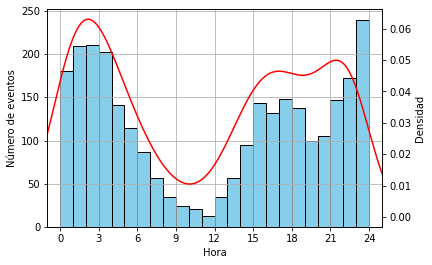

In [7]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['hour_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0, 25))

# Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(-1, 25)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_xticks(range(0, 25, 3))
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_FIGURAS + 'Histograma_hora_Temp.png', format='png')

### Histograma 2: Análisis por mes de la temperatura.

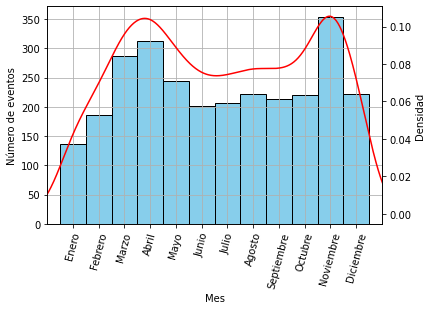

In [20]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['month_min_t'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
ax2 = df['month_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(0, 13)
# bins_labels(range(0,14), 20)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero', 
         'Marzo', 'Abril', 
         'Mayo', 'Junio', 
         'Julio', 'Agosto', 
         'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_FIGURAS + 'Histograma_mes_Temp.png', format='png')

### Histograma 3: Análisis por hora de la disminución de temperatura.

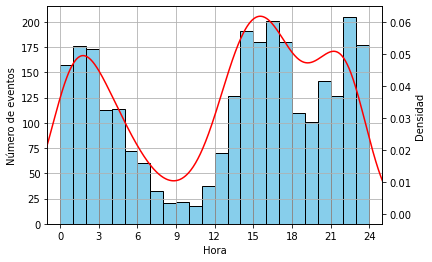

In [8]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['hour_max_dt'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0, 25))

# Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
ax2 = df['hour_max_dt'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(-1, 25)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_ylabel("Número de eventos")
ax.set_xticks(range(0, 25, 3))
plt.savefig(PATH_FIGURAS + 'Histograma_hora_dism.png', format='png')

### Histograma 4: Análisis por mes de la disminución de temperatura.

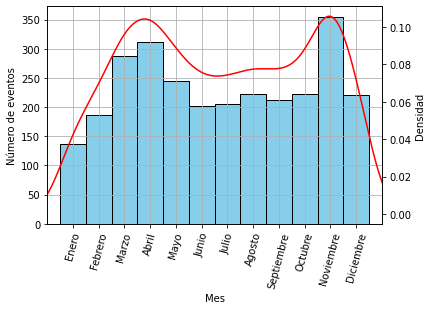

In [21]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['month_max_dt'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
ax2 = df['month_max_dt'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(0, 13)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero', 
         'Marzo', 'Abril', 
         'Mayo', 'Junio', 
         'Julio', 'Agosto', 
         'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_ylabel("Número de eventos")
plt.savefig(PATH_FIGURAS + 'Histograma_mes_dism.png', format='png')

In [13]:
christian=1